In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
#6 practices of EDA They are iterative
#Discovering, Strcturing, Cleaning, Joining, Validating, Presenting

In [26]:
#Combined_Hamburg_Seasons
try:
    df = pd.read_csv('Combined_Hamburg_Seasons.csv', encoding='latin1') 
except UnicodeDecodeError:
    try:
        df = pd.read_csv('Combined_Hamburg_Seasons.csv', encoding='utf-16')
    except UnicodeDecodeError:
        print("Encoding could not be determined.") 

df.head(10)

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117
0,26/07/2019,19:30,Stuttgart,Hannover,2,1,H,2,1,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27/07/2019,12:00,Dresden,Nurnberg,0,1,A,0,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27/07/2019,14:30,Holstein Kiel,Sandhausen,1,1,D,0,1,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27/07/2019,14:30,Osnabruck,Heidenheim,1,3,A,0,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28/07/2019,12:30,Hamburg,Darmstadt,1,1,D,0,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,28/07/2019,14:30,Greuther Furth,Erzgebirge Aue,0,2,A,0,1,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,28/07/2019,14:30,Regensburg,Bochum,3,1,H,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,28/07/2019,14:30,Wehen,Karlsruhe,1,2,A,0,1,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,29/07/2019,19:30,Bielefeld,St Pauli,1,1,D,0,1,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,02/08/2019,17:30,Bochum,Bielefeld,3,3,D,0,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.shape

(1683, 118)

In [27]:
# Drop columns with any NaN values
df = df.dropna(axis=1) 

# Display the DataFrame with dropped columns
df.head(10)


,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,26/07/2019,19:30,Stuttgart,Hannover,2,1,H,2,1,H,...,7,2,14,15,4,3,6,3,1,1
1,27/07/2019,12:00,Dresden,Nurnberg,0,1,A,0,0,D,...,3,2,16,9,12,1,2,2,0,0
2,27/07/2019,14:30,Holstein Kiel,Sandhausen,1,1,D,0,1,A,...,3,3,4,22,5,7,0,4,0,0
3,27/07/2019,14:30,Osnabruck,Heidenheim,1,3,A,0,0,D,...,2,6,12,13,6,6,2,1,1,0
4,28/07/2019,12:30,Hamburg,Darmstadt,1,1,D,0,0,D,...,7,4,12,15,7,2,2,4,0,0
5,28/07/2019,14:30,Greuther Furth,Erzgebirge Aue,0,2,A,0,1,A,...,7,7,9,17,9,2,1,4,0,0
6,28/07/2019,14:30,Regensburg,Bochum,3,1,H,1,0,H,...,6,4,13,9,5,3,2,2,0,0
7,28/07/2019,14:30,Wehen,Karlsruhe,1,2,A,0,1,A,...,4,4,9,17,5,4,2,2,0,0
8,29/07/2019,19:30,Bielefeld,St Pauli,1,1,D,0,1,A,...,5,3,8,15,8,0,2,2,0,0
9,02/08/2019,17:30,Bochum,Bielefeld,3,3,D,0,0,D,...,8,7,9,17,4,5,3,2,0,0


In [28]:
# Explicitly define the date format as
#df.columns DD/MM/YYYY
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [29]:
# Extract the day of the week, month and year
df['day_of_week'] = df['Date'].dt.day_name()
df['year'] = df['Date'].dt.year
#df['month'] = df['Date'].dt.month# Drop Div Column

df['month'] = df['Date'].dt.month_name()
#werder_bremen_matches['Month'] = werder_bremen_matches['Date'].dt.month_name()
df.tail(10)

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,day_of_week,year,month
1673,2024-12-15,12:30,Greuther Furth,Hannover,1,0,H,0,0,D,...,14,4,4,2,1,0,0,Sunday,2024,December
1674,2024-12-20,17:30,Elversberg,Schalke 04,1,4,A,1,1,D,...,11,4,1,3,1,0,0,Friday,2024,December
1675,2024-12-20,17:30,Fortuna Dusseldorf,Magdeburg,2,5,A,2,1,H,...,8,4,1,3,3,1,0,Friday,2024,December
1676,2024-12-21,12:00,Hamburg,Greuther Furth,5,0,H,3,0,H,...,7,3,4,2,1,0,0,Saturday,2024,December
1677,2024-12-21,12:00,Paderborn,Karlsruhe,1,2,A,1,2,A,...,8,10,2,2,3,0,0,Saturday,2024,December
1678,2024-12-21,12:00,Preußen Münster,Ulm,0,0,D,0,0,D,...,15,1,3,4,1,0,0,Saturday,2024,December
1679,2024-12-21,19:30,Nurnberg,Braunschweig,1,0,H,0,0,D,...,9,7,3,1,3,0,1,Saturday,2024,December
1680,2024-12-22,12:30,Hannover,Hertha,0,0,D,0,0,D,...,14,7,5,3,4,1,1,Sunday,2024,December
1681,2024-12-22,12:30,Kaiserslautern,FC Koln,0,1,A,0,1,A,...,10,10,5,2,3,0,0,Sunday,2024,December
1682,2024-12-22,12:30,Regensburg,Darmstadt,2,1,H,0,0,D,...,9,6,9,5,2,0,0,Sunday,2024,December


In [30]:
def determine_season(date):
    """
    Determines the Bundesliga2 season based on the given date.

    Args:
        date: Date object representing the match date.

    Returns:
        str: Season name (e.g., "2020", "2021").
    """

    if (date >= pd.to_datetime('2019-07-26')) & (date <= pd.to_datetime('2020-06-28')):
        return '2020'
    elif (date >= pd.to_datetime('2020-09-18')) & (date <= pd.to_datetime('2021-05-23')):
        return '2021'
    elif (date >= pd.to_datetime('2021-07-23')) & (date <= pd.to_datetime('2022-05-15')):
        return '2022'  # Omit this season for Werder Bremen
    elif (date >= pd.to_datetime('2022-07-15')) & (date <= pd.to_datetime('2023-05-28')):
        return '2023'
    elif (date >= pd.to_datetime('2023-07-28')) & (date <= pd.to_datetime('2024-05-19')):
        return '2024'
    #23/08/2024 22/12/2024
    elif (date >= pd.to_datetime('2024-08-02')) & (date <= pd.to_datetime('2025-05-30')):
        return '2025'
    else:
        return 'Unknown'

# Assuming 'df' is your DataFrame with a 'Date' column
df['Season'] = df['Date'].apply(determine_season)

# Example usage:
df.tail()

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HC,AC,HY,AY,HR,AR,day_of_week,year,month,Season
1678,2024-12-21,12:00,Preußen Münster,Ulm,0,0,D,0,0,D,...,1,3,4,1,0,0,Saturday,2024,December,2025
1679,2024-12-21,19:30,Nurnberg,Braunschweig,1,0,H,0,0,D,...,7,3,1,3,0,1,Saturday,2024,December,2025
1680,2024-12-22,12:30,Hannover,Hertha,0,0,D,0,0,D,...,7,5,3,4,1,1,Sunday,2024,December,2025
1681,2024-12-22,12:30,Kaiserslautern,FC Koln,0,1,A,0,1,A,...,10,5,2,3,0,0,Sunday,2024,December,2025
1682,2024-12-22,12:30,Regensburg,Darmstadt,2,1,H,0,0,D,...,6,9,5,2,0,0,Sunday,2024,December,2025


In [31]:
#NB DATASET was joined and pre-cleaned in Excel365
#Unwanted columns to do with betting were removed. 
#Preprocessing. MISSING VALUES 
missing_values = df.isnull().sum()
print(missing_values)

Date           0
Time           0
HomeTeam       0
AwayTeam       0
FTHG           0
FTAG           0
FTR            0
HTHG           0
HTAG           0
HTR            0
HS             0
AS             0
HST            0
AST            0
HF             0
AF             0
HC             0
AC             0
HY             0
AY             0
HR             0
AR             0
day_of_week    0
year           0
month          0
Season         0
dtype: int64


In [8]:
#Preprocessing. Dealing with DUPLICATED data 
# Check for duplicate rows based on all columns
print(df.duplicated().sum())

0


In [32]:
   #HANDLE OUTLERS
# List of columns to calculate interquartile range (IQR) and handle outliers
columns_to_handle = ['FTHG', 'FTAG']
#columns_to_handle = ['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 
                     #'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']

# Handle outliers for each column
for column in columns_to_handle:
    # Calculate the interquartile range (IQR) for the current column
    percentile25 = df[column].quantile(0.25)
    percentile75 = df[column].quantile(0.75)
    iqr = percentile75 - percentile25

    # Calculate upper and lower thresholds for outliers
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    # Filter the DataFrame to include outliers for the current column
    mask_outlier = (df[column] >= upper_limit)
    df_outlier = df[mask_outlier].copy()
    df_outlier


In [33]:
#HANDLE OUTLERS
# List of columns to calculate interquartile range (IQR) and handle outliers
columns_to_handle = ['FTHG', 'FTAG']
#columns_to_handle = ['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 
                     #'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']

# Handle outliers for each column
for column in columns_to_handle:
    # Calculate the interquartile range (IQR) for the current column
    percentile25 = df[column].quantile(0.25)
    percentile75 = df[column].quantile(0.75)
    iqr = percentile75 - percentile25

    # Calculate upper and lower thresholds for outliers
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    # Filter the DataFrame to remove outliers for the current column
    mask = (df[column] >= lower_limit) & (df[column] <= upper_limit)
    df = df[mask].copy()


In [11]:
# Write the DataFrame to a CSV file without the index
df.to_csv('Bundesliga2_2020To2024OutliersCleaned.csv', index=False)

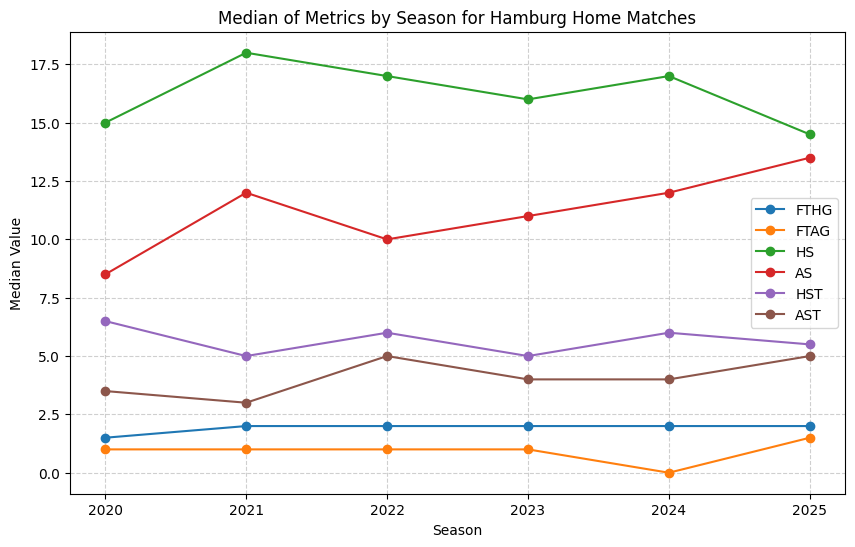

In [34]:
# Filter DataFrame for rows where 'HomeTeam' is 'Hamburg'
#Werder_filtered_df = df[df['HomeTeam'] == 'Hamburg']
# Filter DataFrame for rows where 'HomeTeam' or 'Away Team' is 'Hamburg'
Hamburg_filtered_df_home = df[(df['HomeTeam'] == 'Hamburg') ]

# List of metrics to analyze
metrics = ['FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST']

# Calculate the median of each metric by year
median_by_year_home = Hamburg_filtered_df_home.groupby('Season')[metrics].median().reset_index()

# Write the DataFrame to a CSV file without the index
Hamburg_filtered_df_home.to_csv('Median_metrics_Hamburg_home.csv', index=False)
median_by_year_home.to_csv('median_by_year_home.csv', index=False)

# Plot the median of each metric by year
plt.figure(figsize=(10, 6))
for metric in metrics:
    plt.plot(median_by_year_home['Season'], median_by_year_home[metric], marker='o', label=metric)

plt.xlabel('Season')
plt.ylabel('Median Value')
plt.title('Median of Metrics by Season for Hamburg Home Matches')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

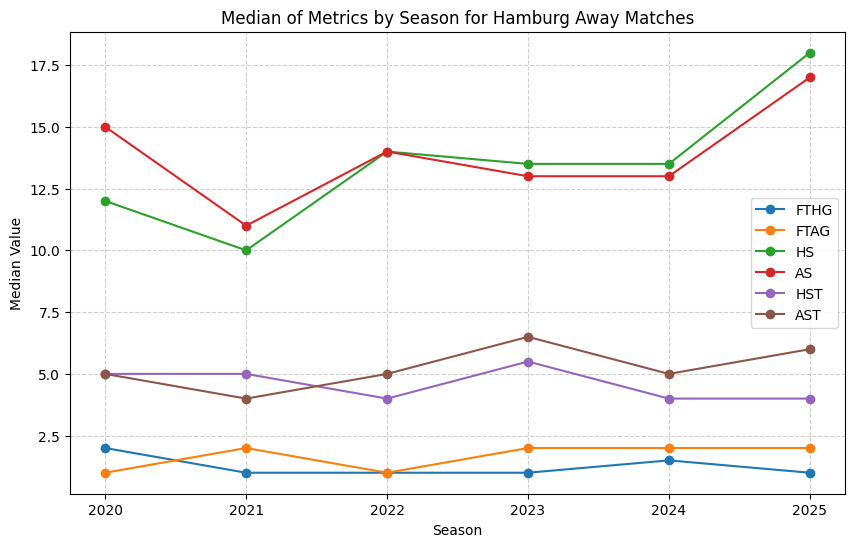

In [35]:
# Filter DataFrame for rows where 'HomeTeam' is 'Hamburg'
#Werder_filtered_df = df[df['HomeTeam'] == 'Hamburg']
# Filter DataFrame for rows where 'HomeTeam' or 'Away Team' is 'Hamburg'
Hamburg_filtered_df_away = df[(df['AwayTeam'] == 'Hamburg') ]

# List of metrics to analyze
metrics = ['FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST']

# Calculate the median of each metric by year
median_by_year_away = Hamburg_filtered_df_away.groupby('Season')[metrics].median().reset_index()

# Write the DataFrame to a CSV file without the index
Hamburg_filtered_df_away.to_csv('Median_metrics_Hamburg_away.csv', index=False)
median_by_year_away.to_csv('median_by_year_away.csv', index=False)

# Plot the median of each metric by year
plt.figure(figsize=(10, 6))
for metric in metrics:
    plt.plot(median_by_year_away['Season'], median_by_year_away[metric], marker='o', label=metric)

plt.xlabel('Season')
plt.ylabel('Median Value')
plt.title('Median of Metrics by Season for Hamburg Away Matches')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Number of times Hamburg led at HT and won: 19
Number of times Hamburg led at HT and drew: 0
Number of times Hamburg led at HT and lost: 1


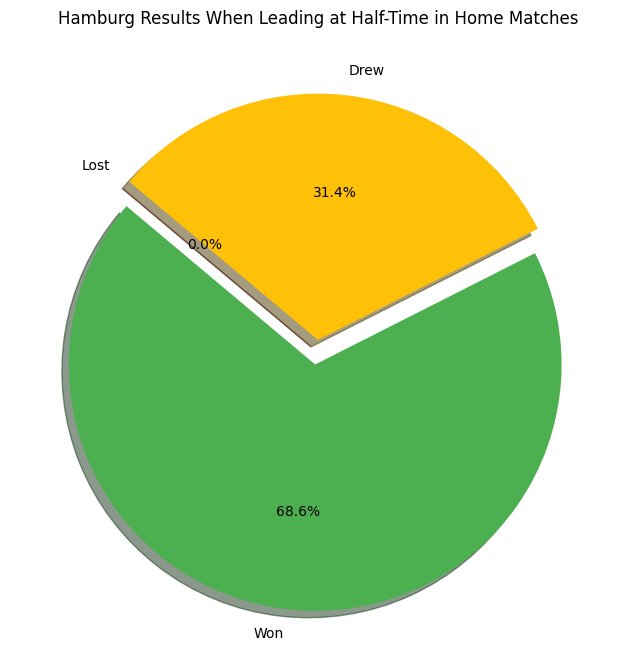

In [43]:
# Filter for Werder Bremen's HOME matches
#werder_bremen_home_matches = df[df['HomeTeam'] == 'Werder Bremen']
#Hamburg_filtered_df_home = df[(df['HomeTeam'] == 'Hamburg') ]
# Calculate the number of times Hamburg led at halftime and won, drew, or lost
wins_after_leading_home = len(Hamburg_filtered_df_home[
    (Hamburg_filtered_df_home['HTHG'] > Hamburg_filtered_df_home['HTAG']) & 
    (Hamburg_filtered_df_home['FTHG'] > Hamburg_filtered_df_home['FTAG'])
])

draws_after_leading_home = len(Hamburg_filtered_df_home[
    (Hamburg_filtered_df_home['HTHG'] > Hamburg_filtered_df_home['HTAG']) & 
    (Hamburg_filtered_df_home['FTHG'] == Hamburg_filtered_df_home['FTAG'])
])

losses_after_leading_home = len(Hamburg_filtered_df_home[
    (Hamburg_filtered_df_home['HTHG'] > Hamburg_filtered_df_home['HTAG']) & 
    (Hamburg_filtered_df_home['FTHG'] < Hamburg_filtered_df_home['FTAG'])
])

# Print the results
print("Number of times Hamburg led at HT and won:", wins_after_leading)
print("Number of times Hamburg led at HT and drew:", draws_after_leading)
print("Number of times Hamburg led at HT and lost:", losses_after_leading)

# Data for the pie chart
labels = ['Won', 'Drew', 'Lost']
sizes = [wins_after_leading_home, draws_after_leading_home, losses_after_leading_home]  # Corresponding values
colors = ['#4CAF50', '#FFC107', '#F44336']  # Colors for win, draw, and loss
explode = (0.1, 0, 0)  # Explode the first slice (Win) slightly

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, 
        autopct='%1.1f%%', startangle=140, shadow=True)

# Title for the plot
plt.title('Hamburg Results When Leading at Half-Time in Home Matches')

# Display the plot
plt.show()


In [25]:
# Write the DataFrame to a CSV file without the index
df.to_csv('Hamburg_filtered_df_home.csv', index=False)

Number of times Hamburg led at HT and won: 19
Number of times Hamburg led at HT and drew: 0
Number of times Hamburg led at HT and lost: 1


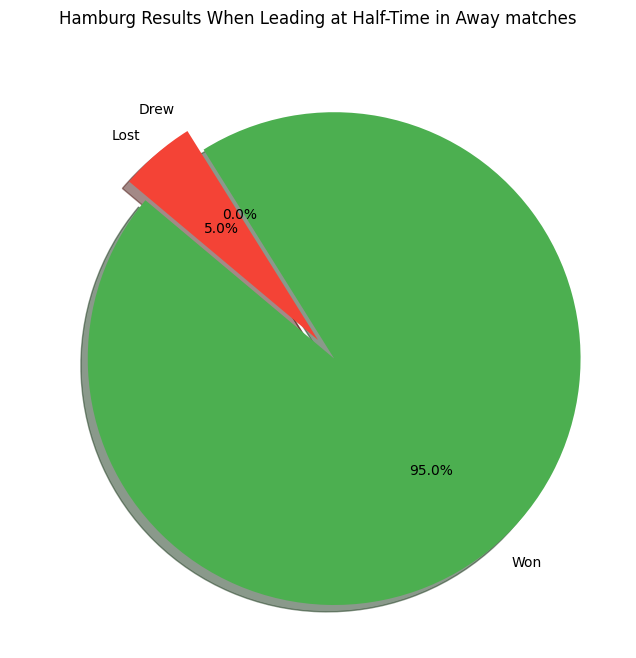

In [42]:
# Filter for Hamburg's AWAY matches
Hamburg_filtered_df_away = df[(df['AwayTeam'] == 'Hamburg') ]
'''
EDIT FIRST: ITS WRONG
'''
# Calculate the number of times Hamburg led at halftime and won, drew, or lost
wins_after_leading_away = len(Hamburg_filtered_df_away[(Hamburg_filtered_df_away['HTHG'] < Hamburg_filtered_df_away['HTAG']) & (Hamburg_filtered_df_away['FTHG'] < Hamburg_filtered_df_away['FTAG'])])
draws_after_leading_away = len(Hamburg_filtered_df_away[(Hamburg_filtered_df_away['HTHG'] < Hamburg_filtered_df_away['HTAG']) & (Hamburg_filtered_df_away['FTR'] == Hamburg_filtered_df_away['FTAG'])])
losses_after_leading_away = len(Hamburg_filtered_df_away[(Hamburg_filtered_df_away['HTHG'] < Hamburg_filtered_df_away['HTAG']) & (Hamburg_filtered_df_away['FTHG'] > Hamburg_filtered_df_away['FTAG'])])

print("Number of times Hamburg led at HT and won:", wins_after_leading)
print("Number of times Hamburg led at HT and drew:", draws_after_leading)
print("Number of times Hamburg led at HT and lost:", losses_after_leading)

# Data for the pie chart
labels = ['Won', 'Drew', 'Lost']
sizes = [wins_after_leading_away, draws_after_leading_away, losses_after_leading_away]  # Corresponding values
colors = ['#4CAF50', '#FFC107', '#F44336']  # Colors for win, draw, and loss
explode = (0.1, 0, 0)  # Explode the first slice (Win) slightly

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, 
        autopct='%1.1f%%', startangle=140, shadow=True)

# Title for the plot
plt.title('Hamburg Results When Leading at Half-Time in Away matches')

# Display the plot
plt.show()

Number of times Hamburg lost at HT and won: 2
Number of times Hamburg lost at HT and drew: 0
Number of times Hamburg lost at HT and lost: 9


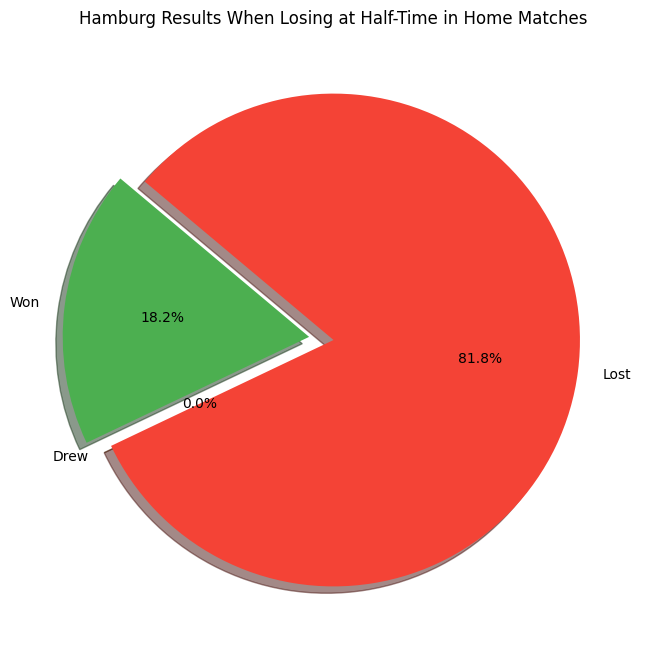

In [47]:
# Filter for Werder Bremen's HOME matches
#werder_bremen_home_matches = df[df['HomeTeam'] == 'Werder Bremen']
#Hamburg_filtered_df_home = df[(df['HomeTeam'] == 'Hamburg') ]
# Calculate the number of times Hamburg lost at halftime and won, drew, or lost
wins_after_losing = len(Hamburg_filtered_df_home[
    (Hamburg_filtered_df_home['HTHG'] < Hamburg_filtered_df_home['HTAG']) & 
    (Hamburg_filtered_df_home['FTHG'] > Hamburg_filtered_df_home['FTAG'])
])

draws_after_losing = len(Hamburg_filtered_df_home[
    (Hamburg_filtered_df_home['HTHG'] < Hamburg_filtered_df_home['HTAG']) & 
    (Hamburg_filtered_df_home['FTHG'] == Hamburg_filtered_df_home['FTAG'])
])

losses_after_losing = len(Hamburg_filtered_df_home[
    (Hamburg_filtered_df_home['HTHG'] < Hamburg_filtered_df_home['HTAG']) & 
    (Hamburg_filtered_df_home['FTHG'] < Hamburg_filtered_df_home['FTAG'])
])

# Print the results
print("Number of times Hamburg lost at HT and won:", wins_after_losing)
print("Number of times Hamburg lost at HT and drew:", draws_after_losing)
print("Number of times Hamburg lost at HT and lost:", losses_after_losing)

# Data for the pie chart
labels = ['Won', 'Drew', 'Lost']
sizes = [wins_after_losing, draws_after_losing, losses_after_losing]  # Corresponding values
colors = ['#4CAF50', '#FFC107', '#F44336']  # Colors for win, draw, and loss
explode = (0.1, 0, 0)  # Explode the first slice (Win) slightly

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, 
        autopct='%1.1f%%', startangle=140, shadow=True)

# Title for the plot
plt.title('Hamburg Results When Losing at Half-Time in Home Matches')

# Display the plot
plt.show()


Number of times Hamburg drew at HT and won: 12
Number of times Hamburg drew at HT and drew: 11
Number of times Hamburg drew at HT and lost: 7


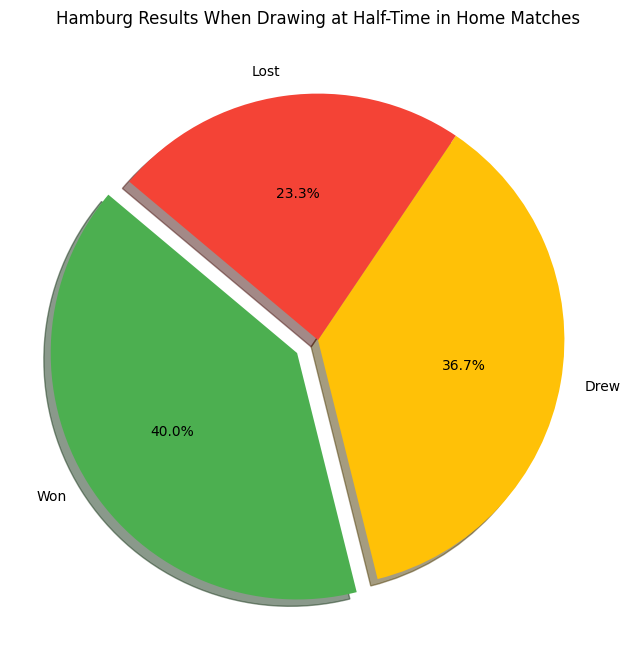

In [49]:
# Filter for Werder Bremen's HOME matches
#werder_bremen_home_matches = df[df['HomeTeam'] == 'Werder Bremen']
#Hamburg_filtered_df_home = df[(df['HomeTeam'] == 'Hamburg') ]
# Calculate the number of times Hamburg drew at halftime and won, drew, or lost
wins_after_drawing = len(Hamburg_filtered_df_home[
    (Hamburg_filtered_df_home['HTHG'] == Hamburg_filtered_df_home['HTAG']) & 
    (Hamburg_filtered_df_home['FTHG'] > Hamburg_filtered_df_home['FTAG'])
])

draws_after_drawing = len(Hamburg_filtered_df_home[
    (Hamburg_filtered_df_home['HTHG'] == Hamburg_filtered_df_home['HTAG']) & 
    (Hamburg_filtered_df_home['FTHG'] == Hamburg_filtered_df_home['FTAG'])
])

losses_after_drawing = len(Hamburg_filtered_df_home[
    (Hamburg_filtered_df_home['HTHG'] == Hamburg_filtered_df_home['HTAG']) & 
    (Hamburg_filtered_df_home['FTHG'] < Hamburg_filtered_df_home['FTAG'])
])

# Print the results
print("Number of times Hamburg drew at HT and won:", wins_after_drawing)
print("Number of times Hamburg drew at HT and drew:", draws_after_drawing)
print("Number of times Hamburg drew at HT and lost:", losses_after_drawing)

# Data for the pie chart
labels = ['Won', 'Drew', 'Lost']
sizes = [wins_after_drawing, draws_after_drawing, losses_after_drawing]  # Corresponding values
colors = ['#4CAF50', '#FFC107', '#F44336']  # Colors for win, draw, and loss
explode = (0.1, 0, 0)  # Explode the first slice (Win) slightly

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, 
        autopct='%1.1f%%', startangle=140, shadow=True)

# Title for the plot
plt.title('Hamburg Results When Drawing at Half-Time in Home Matches')

# Display the plot
plt.show()


In [51]:
#Building Shooting Dataset
import requests
#https://fbref.com/en/comps/33/2019-2020/2019-2020-2-Bundesliga-Stats
#https://fbref.com/en/comps/20/2023-2024/2023-2024-Bundesliga-Stats
    #2019
data_team_squad=requests.get('https://fbref.com/en/comps/33/2019-2020/2019-2020-2-Bundesliga-Stats')
squads_shooting_hamburg=pd.read_html(data_team_squad.text,match='Squad Shooting')[0]
#Drop Level
#squads_shooting_bremen.column=squads_shooting_bremen.columns.droplevel()
#squads_shooting_hamburg

In [52]:
# Write the DataFrame to a CSV file without the index
squads_shooting_hamburg.to_csv('squads_shooting_hamburg_2020.csv', index=False)

In [53]:
#https://fbref.com/en/comps/33/2020-2021/2020-2021-2-Bundesliga-Stats
data_team_squad_2021=requests.get('https://fbref.com/en/comps/33/2020-2021/2020-2021-2-Bundesliga-Stats')
squads_shooting_hamburg_2021=pd.read_html(data_team_squad_2021.text,match='Squad Shooting')[0]
# Write the DataFrame to a CSV file without the index
squads_shooting_hamburg_2021.to_csv('squads_shooting_hamburg_2021.csv', index=False)

In [54]:
#https://fbref.com/en/comps/33/2021-2022/2021-2022-2-Bundesliga-Stats
data_team_squad_2022=requests.get('https://fbref.com/en/comps/33/2021-2022/2021-2022-2-Bundesliga-Stats')
squads_shooting_hamburg_2022=pd.read_html(data_team_squad_2022.text,match='Squad Shooting')[0]
# Write the DataFrame to a CSV file without the index
squads_shooting_hamburg_2022.to_csv('squads_shooting_hamburg_2022.csv', index=False)

In [55]:
#https://fbref.com/en/comps/33/2022-2023/2022-2023-2-Bundesliga-Stats
data_team_squad_2023=requests.get('https://fbref.com/en/comps/33/2022-2023/2022-2023-2-Bundesliga-Stats')
squads_shooting_hamburg_2023=pd.read_html(data_team_squad_2023.text,match='Squad Shooting')[0]
# Write the DataFrame to a CSV file without the index
squads_shooting_hamburg_2023.to_csv('squads_shooting_hamburg_2023.csv', index=False)

In [57]:
#https://fbref.com/en/comps/33/2023-2024/2023-2024-2-Bundesliga-Stats
data_team_squad_2024=requests.get('https://fbref.com/en/comps/33/2023-2024/2023-2024-2-Bundesliga-Stats')
squads_shooting_hamburg_2024=pd.read_html(data_team_squad_2024.text,match='Squad Shooting')[0]
# Write the DataFrame to a CSV file without the index
squads_shooting_hamburg_2024.to_csv('squads_shooting_hamburg_2024.csv', index=False)

In [58]:
#https://fbref.com/en/comps/33/2-Bundesliga-Stats
data_team_squad_2025=requests.get('https://fbref.com/en/comps/33/2-Bundesliga-Stats')
squads_shooting_hamburg_2025=pd.read_html(data_team_squad_2025.text,match='Squad Shooting')[0]
# Write the DataFrame to a CSV file without the index
squads_shooting_hamburg_2025.to_csv('squads_shooting_hamburg_2025.csv', index=False)

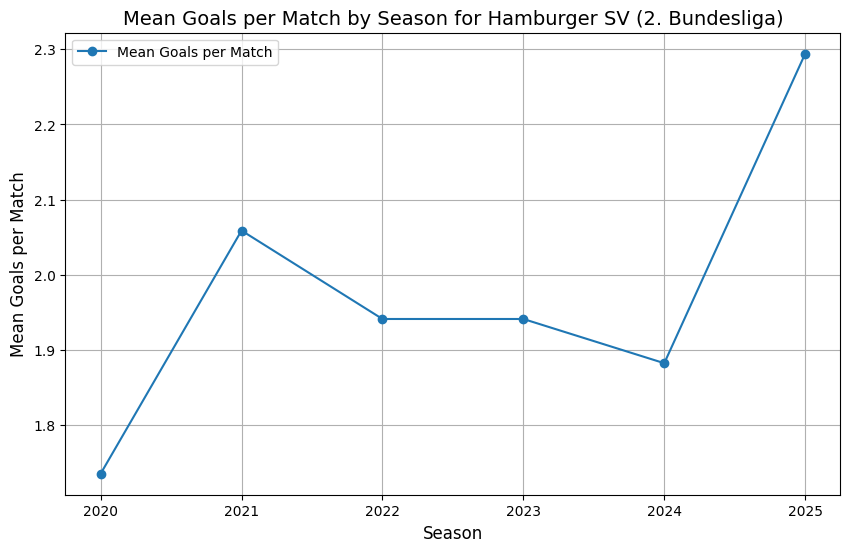

In [59]:

# Load the Excel file
file_path = 'GPT_Hamburger_Shooting_stats.xlsx'  # Replace with the actual file path
data_shooting = pd.ExcelFile(file_path)

# Load and clean the data
df = data_shooting.parse('Sheet1')
df.columns = df.iloc[0]  # Set the first row as the header
df = df[1:]  # Remove the first row
df = df[['Season', 'Gls']]  # Keep only relevant columns (Season and Goals (Gls))
df['Gls'] = pd.to_numeric(df['Gls'], errors='coerce')
df['Season'] = pd.to_numeric(df['Season'], errors='coerce')
df = df.dropna()  # Drop rows with missing values

# Add matches played (34 for all except 2025, which has 17 matches)
df['Matches'] = 34
df.loc[df['Season'] == 2025, 'Matches'] = 17

# Calculate average goals per match
df['Mean_Gls_per_Match'] = df['Gls'] / df['Matches']

# Plot the average goals per match graph
plt.figure(figsize=(10, 6))
plt.plot(df['Season'], df['Mean_Gls_per_Match'], marker='o', linestyle='-', label='Mean Goals per Match')

# Add labels, title, and legend
plt.title('Mean Goals per Match by Season for Hamburger SV (2. Bundesliga)', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Mean Goals per Match', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


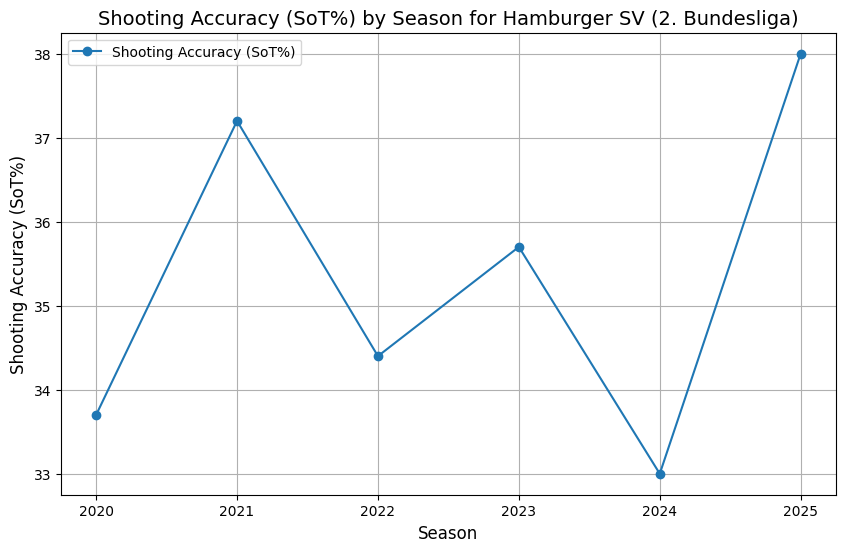

In [60]:
# Load and clean the data
df = data_shooting.parse('Sheet1')
df.columns = df.iloc[0]  # Set the first row as the header
df = df[1:]  # Remove the first row
df = df[['Season', 'SoT%']]  # Keep relevant columns for Shooting Accuracy
df['SoT%'] = pd.to_numeric(df['SoT%'], errors='coerce')
df['Season'] = pd.to_numeric(df['Season'], errors='coerce')
df = df.dropna()  # Drop rows with missing values

# Plot Shooting Accuracy (SoT%) per season
plt.figure(figsize=(10, 6))
plt.plot(df['Season'], df['SoT%'], marker='o', linestyle='-', label='Shooting Accuracy (SoT%)')

# Add labels, title, and legend
plt.title('Shooting Accuracy (SoT%) by Season for Hamburger SV (2. Bundesliga)', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Shooting Accuracy (SoT%)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


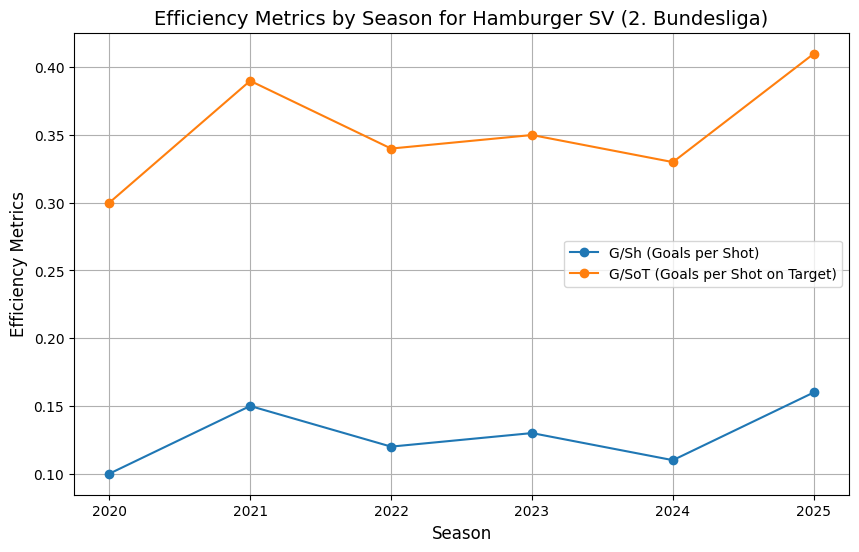

In [61]:
# Load and clean the data
df = data_shooting.parse('Sheet1')
df.columns = df.iloc[0]  # Set the first row as the header
df = df[1:]  # Remove the first row
df = df[['Season', 'G/Sh', 'G/SoT']]  # Keep relevant columns for efficiency metrics
df['G/Sh'] = pd.to_numeric(df['G/Sh'], errors='coerce')
df['G/SoT'] = pd.to_numeric(df['G/SoT'], errors='coerce')
df['Season'] = pd.to_numeric(df['Season'], errors='coerce')
df = df.dropna()  # Drop rows with missing values

# Plot Efficiency Metrics per season
plt.figure(figsize=(10, 6))
plt.plot(df['Season'], df['G/Sh'], marker='o', linestyle='-', label='G/Sh (Goals per Shot)')
plt.plot(df['Season'], df['G/SoT'], marker='o', linestyle='-', label='G/SoT (Goals per Shot on Target)')

# Add labels, title, and legend
plt.title('Efficiency Metrics by Season for Hamburger SV (2. Bundesliga)', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Efficiency Metrics', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


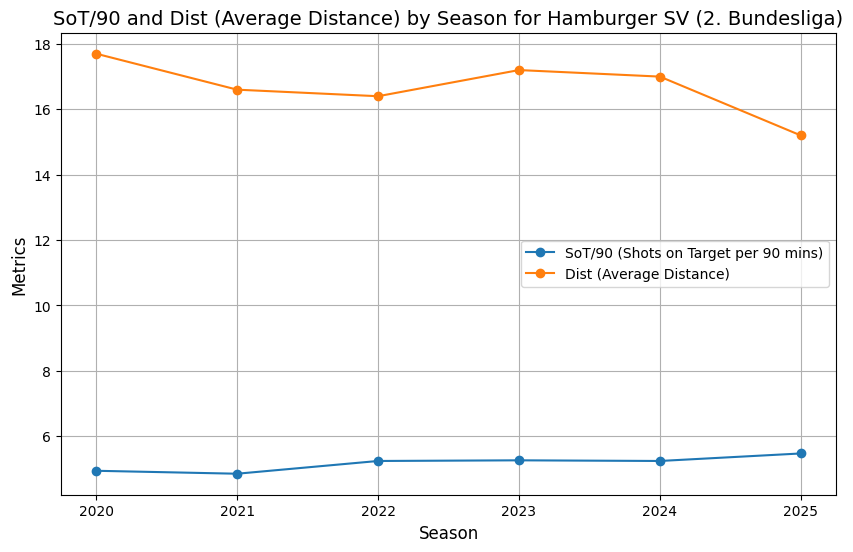

In [62]:

# Load and clean the data
df = data_shooting.parse('Sheet1')
df.columns = df.iloc[0]  # Set the first row as the header
df = df[1:]  # Remove the first row
df = df[['Season', 'SoT/90', 'Dist']]  # Keep relevant columns for SoT/90 and Dist
df['SoT/90'] = pd.to_numeric(df['SoT/90'], errors='coerce')
df['Dist'] = pd.to_numeric(df['Dist'], errors='coerce')
df['Season'] = pd.to_numeric(df['Season'], errors='coerce')
df = df.dropna()  # Drop rows with missing values

# Plot SoT/90 and Dist per season
plt.figure(figsize=(10, 6))
plt.plot(df['Season'], df['SoT/90'], marker='o', linestyle='-', label='SoT/90 (Shots on Target per 90 mins)')
plt.plot(df['Season'], df['Dist'], marker='o', linestyle='-', label='Dist (Average Distance)')

# Add labels, title, and legend
plt.title('SoT/90 and Dist (Average Distance) by Season for Hamburger SV (2. Bundesliga)', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Metrics', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


In [63]:
#BUILDING PASSING DATASET BY SCRAPING DATA FROM https://fbref.com/en/comps/33/2-Bundesliga-Stats
#https://fbref.com/en/comps/33/2-Bundesliga-Stats
data_team_squad_passing_2025=requests.get('https://fbref.com/en/comps/33/2-Bundesliga-Stats')
squads_passing_hamburg_2025=pd.read_html(data_team_squad_passing_2025.text,match='Squad Passing')[0]
# Write the DataFrame to a CSV file without the index
squads_passing_hamburg_2025.to_csv('squads_passing_hamburg_2025.csv', index=False)


In [64]:
data_team_squad_passing_2020=requests.get('https://fbref.com/en/comps/33/2019-2020/2019-2020-2-Bundesliga-Stats')
squads_passing_hamburg_2020=pd.read_html(data_team_squad_passing_2020.text,match='Squad Passing')[0]
#Drop Level
#squads_shooting_bremen.column=squads_shooting_bremen.columns.droplevel()
#squads_shooting_hamburg
# Write the DataFrame to a CSV file without the index
squads_passing_hamburg_2020.to_csv('squads_passing_hamburg_2020.csv', index=False)

In [65]:
#https://fbref.com/en/comps/33/2020-2021/2020-2021-2-Bundesliga-Stats
data_team_squad_passing_2021=requests.get('https://fbref.com/en/comps/33/2020-2021/2020-2021-2-Bundesliga-Stats')
squads_passing_hamburg_2021=pd.read_html(data_team_squad_passing_2021.text,match='Squad Passing')[0]
# Write the DataFrame to a CSV file without the index
squads_passing_hamburg_2021.to_csv('squads_passing_hamburg_2021.csv', index=False)

In [66]:
#https://fbref.com/en/comps/33/2021-2022/2021-2022-2-Bundesliga-Stats
data_team_squad_passing_2022=requests.get('https://fbref.com/en/comps/33/2021-2022/2021-2022-2-Bundesliga-Stats')
squads_passing_hamburg_2022=pd.read_html(data_team_squad_passing_2022.text,match='Squad Passing')[0]
# Write the DataFrame to a CSV file without the index
squads_passing_hamburg_2022.to_csv('squads_passing_hamburg_2022.csv', index=False)

In [70]:
#https://fbref.com/en/comps/33/2022-2023/2022-2023-2-Bundesliga-Stats
data_team_squad_passing_2023=requests.get('https://fbref.com/en/comps/33/2022-2023/2022-2023-2-Bundesliga-Stats')
squads_passing_hamburg_2023=pd.read_html(data_team_squad_passing_2023.text,match='Squad Passing')[0]
# Write the DataFrame to a CSV file without the index
squads_passing_hamburg_2023.to_csv('squads_passing_hamburg_2023.csv', index=False)

In [71]:
#https://fbref.com/en/comps/33/2023-2024/2023-2024-2-Bundesliga-Stats
data_team_squad_passing_2024=requests.get('https://fbref.com/en/comps/33/2023-2024/2023-2024-2-Bundesliga-Stats')
squads_passing_hamburg_2024=pd.read_html(data_team_squad_passing_2024.text,match='Squad Passing')[0]
# Write the DataFrame to a CSV file without the index
squads_passing_hamburg_2024.to_csv('squads_passing_hamburg_2024.csv', index=False)

In [72]:
#https://fbref.com/en/comps/33/2-Bundesliga-Stats
data_team_squad_passing_2025=requests.get('https://fbref.com/en/comps/33/2-Bundesliga-Stats')
squads_passing_hamburg_2025=pd.read_html(data_team_squad_passing_2025.text,match='Squad Passing')[0]
# Write the DataFrame to a CSV file without the index
squads_passing_hamburg_2025.to_csv('squads_passing_hamburg_2025.csv', index=False)

In [ ]:
#PASSING ANALYSIS BY TYPE

# Clean the data: Set the correct headers and drop irrelevant rows/columns
data.columns = data.iloc[0]  # Use the first row as column headers
data = data[1:]  # Drop the first row
data = data[['Season', 'AvgPPA', 'AvgCrsPA']]  # Keep relevant columns

# Convert columns to numeric for plotting
data['AvgPPA'] = pd.to_numeric(data['AvgPPA'], errors='coerce')
data['AvgCrsPA'] = pd.to_numeric(data['AvgCrsPA'], errors='coerce')
data['Season'] = data['Season'].astype(int)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data['Season'], data['AvgPPA'], marker='o', label='AvgPPA')
plt.plot(data['Season'], data['AvgCrsPA'], marker='s', label='AvgCrsPA')

# Add labels, title, and legend
plt.xlabel('Season')
plt.ylabel('Average Value')
plt.title('Season vs AvgPPA and AvgCrsPA')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
lt

# Clean the data: Set the correct headers and drop irrelevant rows/columns
pass_data.columns = pass_data.iloc[0]  # Use the first row as column headers
pass_data = pass_data[1:]  # Drop the first row
pass_data = pass_data[['Season', 'Short %', 'Medium %', 'Long %']]  # Keep relevant columns

# Convert columns to numeric for plotting
pass_data['Season'] = pass_data['Season'].astype(int)
pass_data['Short %'] = pd.to_numeric(pass_data['Short %'], errors='coerce')
pass_data['Medium %'] = pd.to_numeric(pass_data['Medium %'], errors='coerce')
pass_data['Long %'] = pd.to_numeric(pass_data['Long %'], errors='coerce')

# Plot the data
plt.figure(figsize=(12, 7))
plt.plot(pass_data['Season'], pass_data['Short %'], marker='o', label='Short Pass %')
plt.plot(pass_data['Season'], pass_data['Medium %'], marker='s', label='Medium Pass %')
plt.plot(pass_data['Season'], pass_data['Long %'], marker='^', label='Long Pass %')

# Add labels, title, and legend
plt.xlabel('Season')
plt.ylabel('Completion Percentage (%)')
plt.title('Pass Types Completion Percentage Per Season')
plt.legend()
plt.grid(True)
plt.show()
